# Application Efficiency vs. Checkpoint Interval vs. MTBF
by Craig Walker

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import os.path
import re

In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text
    
def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [3]:
output = ""

input_csv = "time_1000_df_final.csv"

df_final=pd.read_csv(input_csv,header=0,sep=",")
exp = os.path.basename(input_csv)

df_final = df_final.rename(columns={"SMTBF":"MTBF"})
df_final['MTBF'] = df_final['MTBF'].astype('int')

uniques=df_final['MTBF'].unique()
uniques.sort()
uniques=uniques[::-1]
num_SMTBF = len(uniques)

In [4]:
df_final['Type'] = df_final['Type'].replace("Actual","Experimental")

In [8]:

sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("white")


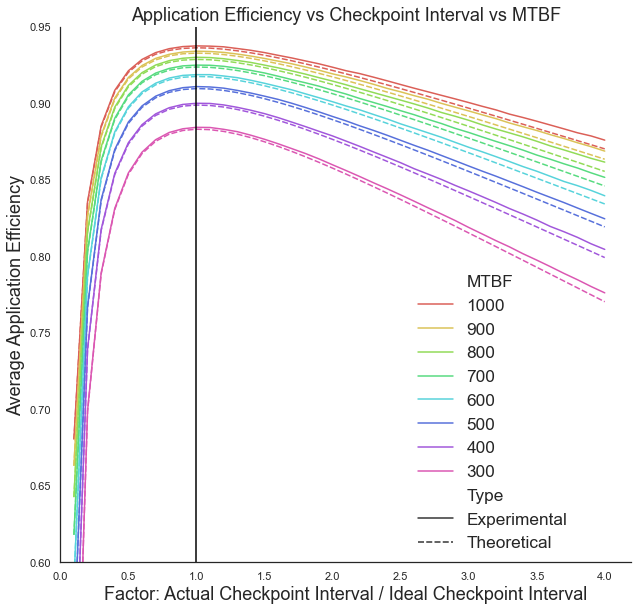

In [15]:
new_title = 'Application Efficiency vs Checkpoint Interval vs MTBF'
newx="Factor: Actual Checkpoint Interval / Ideal Checkpoint Interval"
newy="Average Application Efficiency"

g = sns.relplot(x="x", y="y", kind="line",hue="MTBF",hue_order=uniques,\
        palette=sns.color_palette(palette="hls", n_colors=num_SMTBF),\
        data=df_final,
        legend=True,
        height=9,style='Type').set(\
            title=new_title,xlabel=newx,ylabel=newy)
#leg = g._legend
g._legend.remove()
#plt.setp(g.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(g.get_legend().get_title(), fontsize='32') # for legend title
plt.legend(bbox_to_anchor=(0.9, 0.55),
           borderaxespad=0, 
           frameon=False, 
           ncol=1,
           fontsize='x-large', 
           title_fontsize='40')


#plt.legend(fontsize=20) # using a size in points
#plt.legend(fontsize="x-large") # using a named size

#leg.set_bbox_to_anchor([0.9, .3])


plt.axvline(1.0, 0,1,color="black")
plt.xlabel(newx,fontsize=18)
plt.ylabel(newy,fontsize=18)
plt.title(new_title,fontsize=18)
g.axes[0,0].set_ylim(.60,.95)
g.axes[0,0].set_xlim(0, None)
fig = plt.gcf()
fig.set_size_inches(10,8)
g.savefig(f"{exp}_AE_plot.png",dpi=300)
g.savefig(f"{exp}_AE_plot.pdf",dpi=300)


# uniques = uniques.astype('str')
# df_final['MTBF'] = df_final['MTBF'].astype('str')

# g = sns.relplot(x="x", y="y", kind="line",hue="MTBF",hue_order=uniques,\
#             palette=sns.color_palette(palette="hls", n_colors=num_SMTBF),\
#             data=df_final,legend="full",height=8).set(\
#                                                     title=new_title,xlabel=newx,ylabel=newy)
# leg = g._legend
# leg.set_bbox_to_anchor([0.5, .75])
# plt.axvline(1.0, 0,1,color="black")
# #g.savefig(f"{exp}_AE_plot_no_theoretical.png",dpi=300)
# #g.savefig(f"{exp}_AE_plot_no_theoretical.pdf",dpi=300)
# g.savefig(f"{exp}_AE_plot_no_theoretical.png")
# g.savefig(f"{exp}_AE_plot_no_theoretical.pdf")

In [5]:
#df_final.head()